In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/wineQualityReds.csv')
data.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data['target'] = data['quality'].apply(lambda x: 1 if x>=6 else 0)
data['target'].value_counts()

1    855
0    744
Name: target, dtype: int64

In [4]:
data = data.drop('quality', axis = 1)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [6]:
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
X_test.shape

(480, 12)

In [8]:
from sklearn.metrics import f1_score

In [9]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print(f1_score(y_test, y_pred))

0.7390476190476191


c:\Users\Anna\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
dt = DecisionTreeClassifier(random_state=42, max_depth=10)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(f1_score(y_test, y_pred))

0.7601476014760148


In [11]:
from sklearn.ensemble import BaggingClassifier

In [12]:
bagg = BaggingClassifier(random_state=42, estimator=DecisionTreeClassifier(random_state=42, max_depth=10), n_estimators=1500)
bagg.fit(X_train, y_train)
y_pred = bagg.predict(X_test)
print(f1_score(y_test, y_pred))

0.8239700374531835


In [13]:
df = pd.read_csv('data/boston (1).csv', decimal=',')
df.head()

,crim_rate,zn,business,river,nit_oxiden,rooms,age,dist,highways_index,tax,pup_per_teaс,lower,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [14]:
X = df.drop('target', axis = 1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, test_size=0.3)

In [15]:
y_train.describe()


count    354.000000
mean      22.773164
std        9.233011
min        5.000000
25%       17.200000
50%       21.550000
75%       25.975000
max       50.000000
Name: target, dtype: float64

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
metrics.mean_absolute_error(y_test, y_pred)

3.7222793958561513

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#3,10,100,500

In [19]:
dt = DecisionTreeRegressor(random_state=13)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
metrics.mean_absolute_error(y_test, y_pred)

2.8388157894736845

In [20]:
rf_3 = RandomForestRegressor(random_state=13, n_estimators=3)
rf_3.fit(X_train, y_train)
y_pred = rf_3.predict(X_test)
metrics.mean_absolute_error(y_test, y_pred)

2.9328947368421057

In [21]:
rf_10 = RandomForestRegressor(random_state=13, n_estimators=10)
rf_10.fit(X_train, y_train)
y_pred = rf_10.predict(X_test)
metrics.mean_absolute_error(y_test, y_pred)

2.466315789473684

In [22]:
rf_100 = RandomForestRegressor(random_state=13, n_estimators=100)
rf_100.fit(X_train, y_train)
y_pred = rf_100.predict(X_test)
metrics.mean_absolute_error(y_test, y_pred)

2.2559736842105265

In [23]:
rf_500 = RandomForestRegressor(random_state=13, n_estimators=500)
rf_500.fit(X_train, y_train)
y_pred = rf_500.predict(X_test)
metrics.mean_absolute_error(y_test, y_pred)

2.2365657894736892

In [24]:
weather = pd.read_csv('data/weatherAUS.csv')
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [25]:
weather['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [26]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [27]:
weather.isnull().mean()*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [28]:
cols_to_drop = ['Evaporation', 'Sunshine', 'Cloud3pm']
weather = weather.drop(cols_to_drop, axis=1)

In [29]:
def yes_no(f):
    if f=="Yes":
        f=1
    elif f=='No':
        f=0
    return f

In [30]:
weather['RainToday'] = weather['RainToday'].apply(yes_no)
weather['RainTomorrow'] = weather['RainTomorrow'].apply(yes_no)

In [31]:
weather['RainToday'].mean()

0.22419285648984874

In [32]:
weather['Date'] = pd.to_datetime(weather['Date'])
weather['Month'] = weather['Date'].dt.month
weather = weather.drop('Date', axis=1)
weather.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,16.9,21.8,0.0,0.0,12
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,17.2,24.3,0.0,0.0,12
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,21.0,23.2,0.0,0.0,12
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,18.1,26.5,0.0,0.0,12
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,17.8,29.7,0.0,0.0,12


In [33]:
rainy = weather.groupby('Month')['RainToday'].count()
rainy

Month
1     12914
2     10525
3     13038
4     11303
5     13058
6     12392
7     11779
8     11763
9     11347
10    11811
11    11454
12    10815
Name: RainToday, dtype: int64

In [34]:
categoricals = ['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
weather = pd.get_dummies(weather, columns=categoricals)
weather.shape

(145460, 124)

In [35]:
weather_cleaned = weather.dropna(how='any', axis=0)
weather_cleaned.isnull().sum().sum()

0

In [36]:
X = weather_cleaned.drop('RainTomorrow', axis=1)
y = weather_cleaned['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=31, test_size=0.3)

In [37]:
y_test.mean()

0.22770253002811142

In [38]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
metrics.roc_auc_score(y_test, y_pred)

0.7388409984097167

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [40]:
params = {'max_leaf_nodes': list(range(2, 10)), 'min_samples_split': [2, 3, 4], 'max_depth': [5,7,9,11]}
grig_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=31), cv=3, param_grid=params)
grig_search.fit(X_train, y_train)
grig_search.best_params_

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Anna\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Anna\AppData\Local\Temp\ipykernel_26892\1867309946.py", line 3, in <module>
    grig_search.fit(X_train, y_train)
  File "c:\Users\Anna\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py", line 875, in fit
    self._run_search(evaluate_candidates)
  File "c:\Users\Anna\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py", line 1389, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "c:\Users\Anna\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py", line 822, in evaluate_candidates
    out = parallel(
  File "c:\Users\Anna\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\parallel.py", line 1088, i

In [ ]:
dt = DecisionTreeClassifier(random_state=42, max_depth=5, max_leaf_nodes=9, min_samples_split=2)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
metrics.roc_auc_score(y_test, y_pred)

0.7033229072349596

In [ ]:
rf = RandomForestClassifier(random_state=31, n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
metrics.roc_auc_score(y_test, y_pred)

0.7329684570290497

In [ ]:
params = {'max_features': [ 4, 5, 6, 7], 'min_samples_leaf': [3, 5, 7, 9, 11], 'max_depth': [5, 10, 15]}
grig_search = GridSearchCV(estimator=RandomForestClassifier(n_estimators=100, random_state=31), cv=3, param_grid=params)
grig_search.fit(X_train, y_train)
grig_search.best_params_

{'max_depth': 15, 'max_features': 7, 'min_samples_leaf': 3}

In [ ]:
rf = RandomForestClassifier(random_state=31, n_estimators=100, max_depth=15, max_features=7, min_samples_leaf=3)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
metrics.roc_auc_score(y_test, y_pred)

0.7005484843285417

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot: >

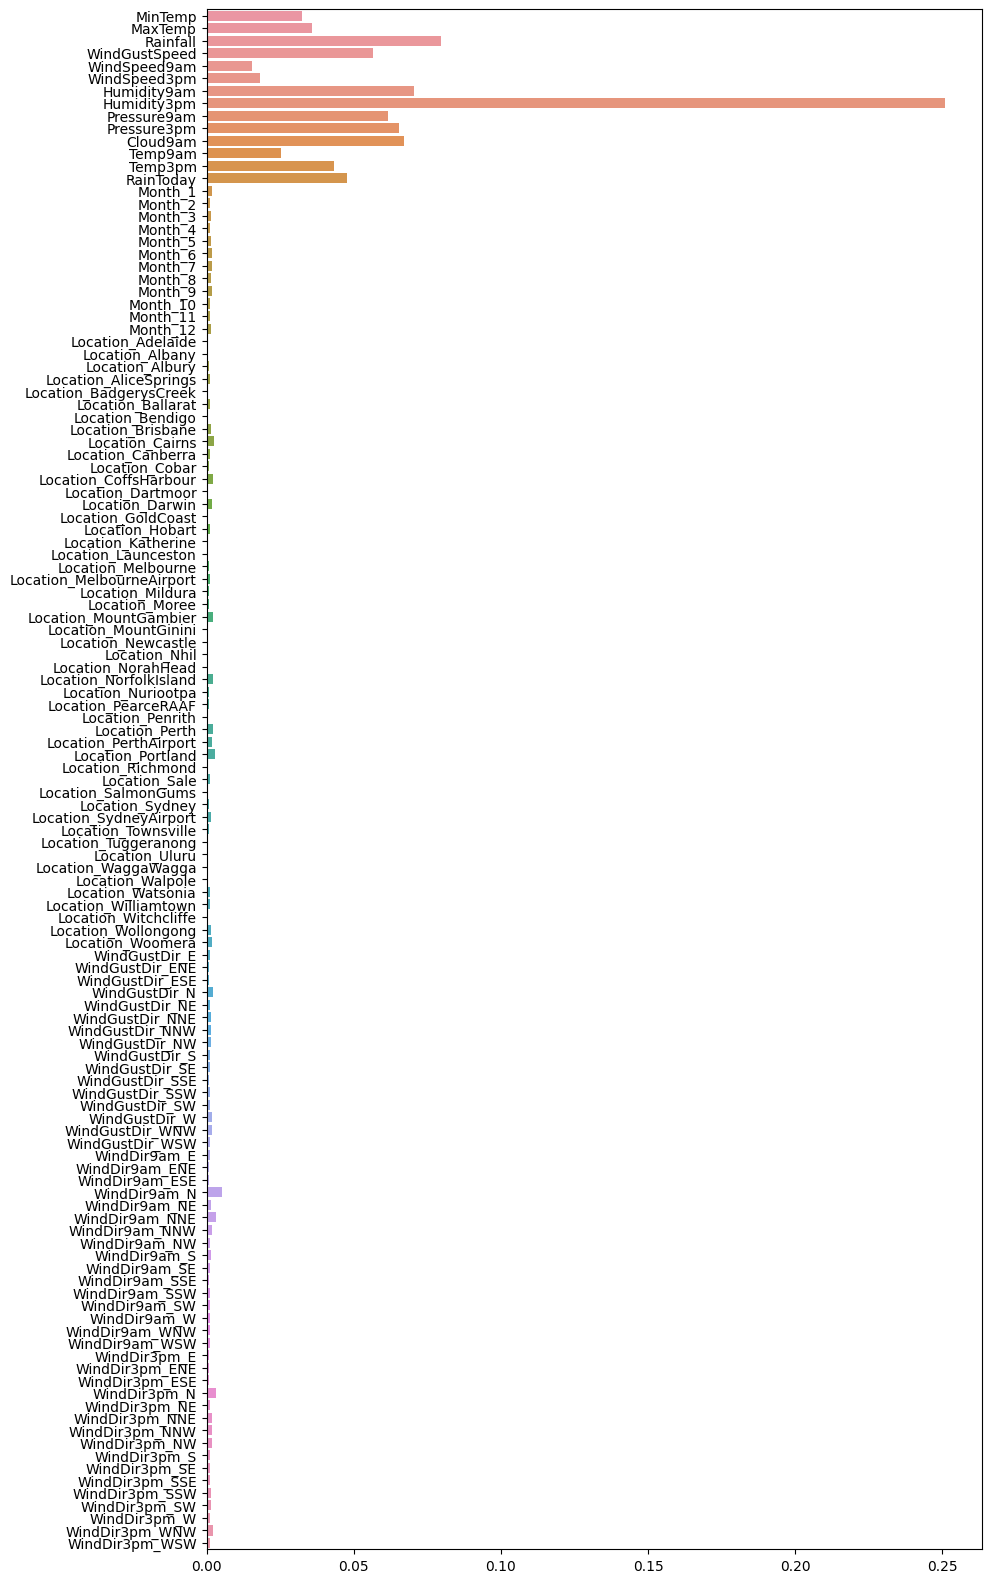

In [ ]:
fig, ax = plt.subplots(figsize=(10,20))
feature = X.columns
feat_imp = rf.feature_importances_
sns.barplot(y=feature, x=feat_imp, ax=ax)

In [ ]:
from sklearn.ensemble import StackingClassifier
